In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.constants as sc
import sys
sys.path.append('/home/ramsus/Programming/NicolasPersonal/University/Herramientas')

In [2]:
import Datos as dt
#se importan los datos de los LEDs de cada color (yellow, green, red, blue)
y, g, r, b = dt.y, dt.g, dt.r, dt.b 

import MetodosBasicos as mb
import MinimosCuadradosOrdinarios as mc

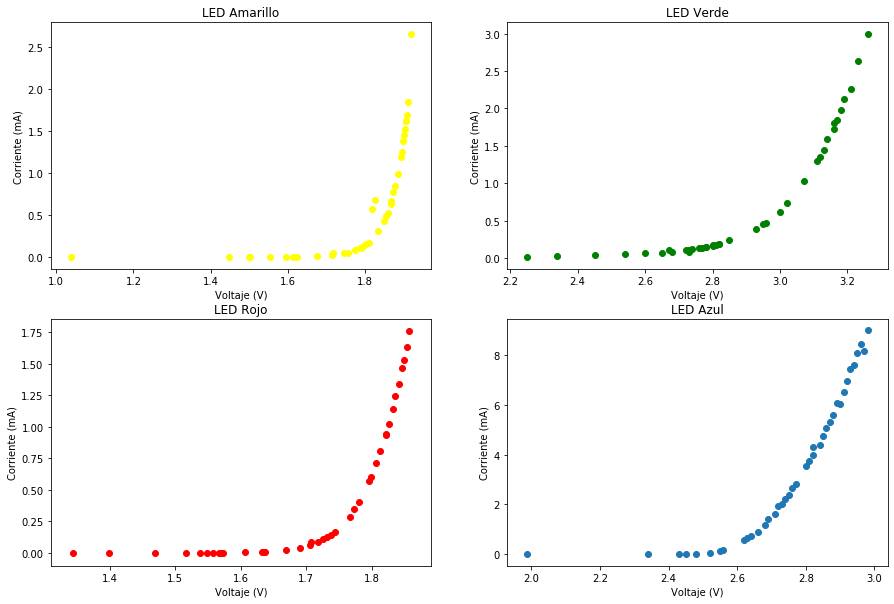

In [3]:
fig, axs = plt.subplots(2,2, figsize =  (15,10))

axs[0,0].scatter(y['V'], y['I'], c= 'yellow')
mb.Nombrar('Voltaje (V)', 'Corriente (mA)', 'LED Amarillo', 2, 0, 0, axs)

axs[0,1].scatter(g['V'], g['I'], c = 'green')
mb.Nombrar('Voltaje (V)', 'Corriente (mA)', 'LED Verde', 2, 0, 1, axs)

axs[1,0].scatter(r['V'], r['I'], c = 'red')
mb.Nombrar('Voltaje (V)', 'Corriente (mA)', 'LED Rojo', 2, 1, 0, axs)

axs[1,1].scatter(b['V'], b['I'])
mb.Nombrar('Voltaje (V)', 'Corriente (mA)', 'LED Azul', 2, 1, 1, axs)


In [4]:
ly, lr, lb, lg = np.log(y['I']), np.log(r['I']), np.log(b['I']), np.log(g['I'])

El metodo minCua recibe 2 arrays y nos devuelve una lista B donde:
     #b = B[0]
     #m = B[1]
corresponden a los parametrso de la regresion lineal

Amarillo: 18.353558633611307x-34.85230111835357
Verde: 5.718933085079089x-17.630085018870712
Rojo: 20.69827499070458x-37.95630694319776
Azul: 12.09117293686058x-32.96128233370759


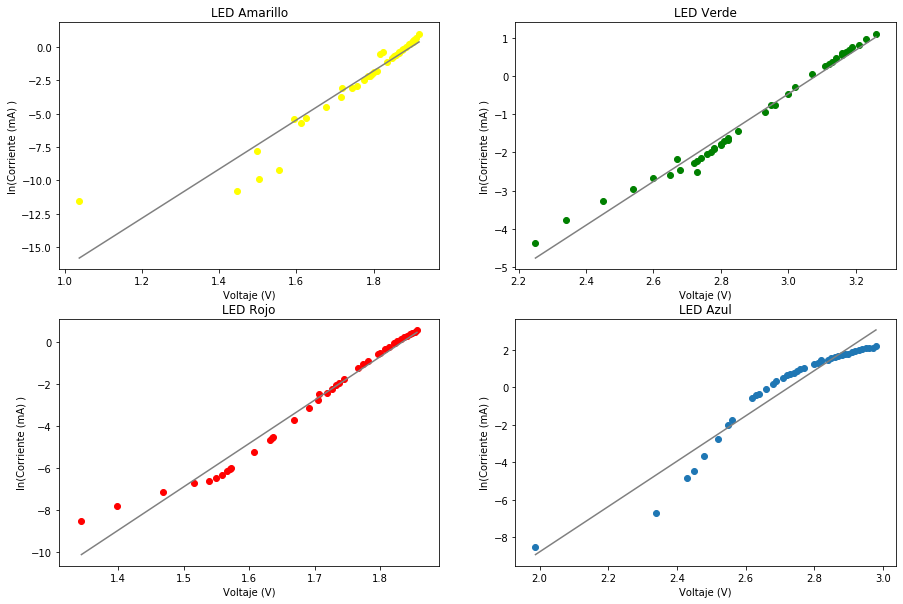

In [5]:
fig, axs = plt.subplots(2,2, figsize =  (15,10))

By = mc.MinCua(y['V'], ly)
B = By
bc = B[0]
m = B[1]
axs[0,0].scatter(y['V'], ly, c= 'yellow')
axs[0,0].plot([min(y['V']), max(y['V'])] , [m*min(y['V']) + bc, m*max(y['V']) + bc], c = "gray" )
mb.Nombrar('Voltaje (V)', 'ln(Corriente (mA) )', 'LED Amarillo', 2, 0, 0, axs)
print('Amarillo: '+str(m)+'x'+str(bc))

Bg = mc.MinCua(g['V'], lg)
B = Bg
bc = B[0]
m = B[1]
axs[0,1].scatter(g['V'], lg, c = 'green')
axs[0,1].plot([min(g['V']), max(g['V'])] , [m*min(g['V']) + bc, m*max(g['V']) + bc], c = "gray" )
mb.Nombrar('Voltaje (V)', 'ln(Corriente (mA) )', 'LED Verde', 2, 0, 1, axs)
print('Verde: '+str(m)+'x'+str(bc))

Br = mc.MinCua(r['V'], lr)
B = Br
bc = B[0]
m = B[1]
axs[1,0].scatter(r['V'], lr, c = 'red')
axs[1,0].plot([min(r['V']), max(r['V'])] , [m*min(r['V']) + bc, m*max(r['V']) + bc], c = "gray" )
mb.Nombrar('Voltaje (V)', 'ln(Corriente (mA) )', 'LED Rojo', 2, 1, 0, axs)
print('Rojo: '+str(m)+'x'+str(bc))


Bb = mc.MinCua(b['V'], lb)
B = Bb
bc = B[0]
m = B[1]
axs[1,1].scatter(b['V'], lb)
axs[1,1].plot([min(b['V']), max(b['V'])] , [m*min(b['V']) + bc, m*max(b['V']) + bc], c = "gray" )
mb.Nombrar('Voltaje (V)', 'ln(Corriente (mA) )', 'LED Azul', 2, 1, 1, axs)
print('Azul: '+str(m)+'x'+str(bc))



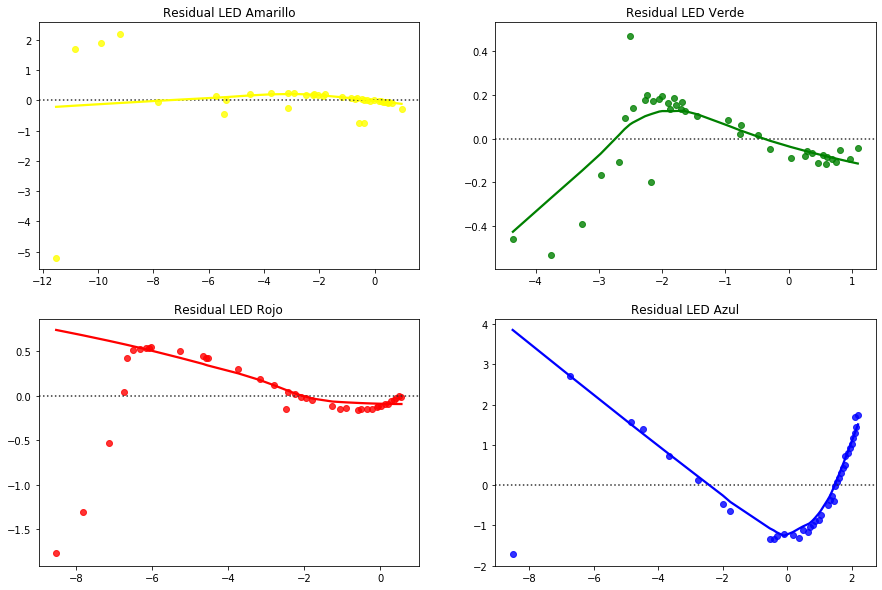

In [6]:
fig, axs = plt.subplots(2,2, figsize =  (15,10))
sns.residplot(ly, By[1]*y['V']+ By[0], ax = axs[0,0], lowess=True, color = 'yellow')
mb.Nombrar('', '', 'Residual LED Amarillo', 2, 0, 0, axs)

sns.residplot(lg, Bg[1]*g['V']+ Bg[0], ax = axs[0,1], lowess=True, color = 'green')
mb.Nombrar('', '', 'Residual LED Verde', 2, 0, 1, axs)

sns.residplot(lr, Br[1]*r['V']+ Br[0], ax = axs[1,0], lowess=True, color = 'red')
mb.Nombrar('', '', 'Residual LED Rojo', 2, 1, 0, axs)

sns.residplot(lb, Br[1]*b['V']+ Bb[0], ax = axs[1,1], lowess=True, color = 'blue')
mb.Nombrar('', '', 'Residual LED Azul', 2, 1, 1, axs)


-6.812001178675203e-34


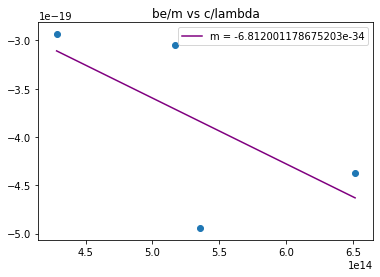

In [9]:
lambdas = np.array([580, 700, 460, 560])*(1/1000000000)

y = np.array( [By[0]/By[1],Br[0]/Br[1], Bb[0]/Bb[1], Bg[0]/Bg[1] ])*sc.e
x = sc.c /lambdas

B = mc.MinCua(x,y)
bc = B[0]
m = B[1]
plt.plot([min(x), max(x)] , [m*min(x) + bc, m*max(x) + bc], c = "purple" , label = 'm = '+ str(m))
plt.scatter(x, y)
plt.title('be/m vs c/lambda')
plt.legend()
plt.savefig('h.png')
print(m)
